In [90]:
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

In [91]:
# Load data
def linesToData(line):
    return list(map(int, line.split(",")))

def loadData(filename):
    with open(filename) as f:
        lines = f.readlines()
        return list(map(linesToData, lines))

def dataToAvgs(data):
    return list(map(avg, data))

def dataToMaxs(data):
    return list(map(max, data))

def printData(data):
    for file in data:
        print("[")
        print(file)
        print("]")

In [92]:
def avg(data):
    return sum(data) / len(data)

In [93]:
DataTuple = namedtuple("Data", "NR ZR BBNR BBZR")
counts = DataTuple(loadData("countsNR"), loadData("countsZR"), loadData("countsBBNR"), loadData("countsBBZR"))
avgs = DataTuple(dataToAvgs(counts.NR), dataToAvgs(counts.ZR), dataToAvgs(counts.BBNR), dataToAvgs(counts.BBZR))
maxs = DataTuple(dataToMaxs(counts.NR), dataToMaxs(counts.ZR), dataToMaxs(counts.BBNR), dataToMaxs(counts.BBZR))

times = DataTuple(loadData("timesNR"), loadData("timesZR"), loadData("timesBBNR"), loadData("timesBBZR"))
tavgs = DataTuple(dataToAvgs(times.NR), dataToAvgs(times.ZR), dataToAvgs(times.BBNR), dataToAvgs(times.BBZR))
tmaxs = DataTuple(dataToMaxs(times.NR), dataToMaxs(times.ZR), dataToMaxs(times.BBNR), dataToMaxs(times.BBZR))

instSize = [4, 10, 15, 20, 22, 25, 27, 30, 32, 35, 37, 40]

In [94]:
print(avgs)
print(maxs)

Data(NR=[13.064, 638.538, 18806.37, 621098.668, 2200533.336, 18734601.704, 72781102.196, 506286568.23], ZR=[18.494, 948.18, 29821.74, 957155.62, 3807041.462, 30675762.468, 122477438.344], BBNR=[4.812, 21.274, 95.826, 640.8, 1456.308, 6813.064, 11364.852, 33716.758], BBZR=[12.77, 318.352, 5742.476, 117450.9, 369426.01, 2386834.284, 7680567.0])
Data(NR=[31, 2047, 65535, 2097151, 8388607, 67108863, 268435455, 2147483647], ZR=[31, 2015, 63187, 2031801, 8122697, 65204369, 261713949], BBNR=[23, 475, 3499, 50621, 96311, 811461, 1014033, 3118907], BBZR=[31, 1003, 21717, 513929, 1703911, 12167247, 41847051])


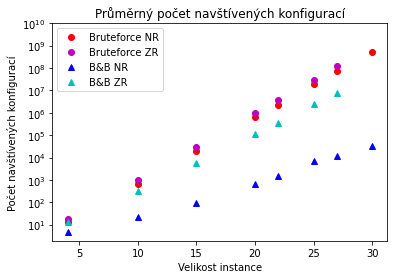

In [112]:
plt.plot(instSize[:len(avgs.NR)], avgs.NR, 'ro', label="Bruteforce NR")
plt.plot(instSize[:len(avgs.ZR)], avgs.ZR, 'mo', label="Bruteforce ZR")
plt.plot(instSize[:len(avgs.BBNR)], avgs.BBNR, 'b^', label="B&B NR")
plt.plot(instSize[:len(avgs.BBZR)], avgs.BBZR, 'c^', label="B&B ZR")
plt.yscale("log")
plt.yticks([10e0, 10e1, 10e2, 10e3, 10e4, 10e5, 10e6, 10e7, 10e8, 10e9])
plt.xlabel("Velikost instance")
plt.ylabel("Počet navštívených konfigurací")
plt.title('Průměrný počet navštívených konfigurací')
plt.legend()

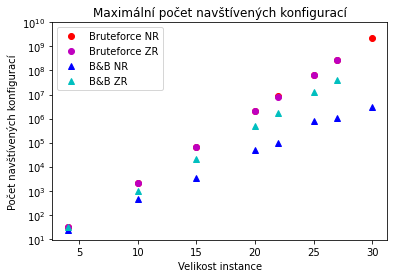

In [113]:
plt.plot(instSize[:len(maxs.NR)], maxs.NR, 'ro', label="Bruteforce NR")
plt.plot(instSize[:len(maxs.ZR)], maxs.ZR, 'mo', label="Bruteforce ZR")
plt.plot(instSize[:len(maxs.BBNR)], maxs.BBNR, 'b^', label="B&B NR")
plt.plot(instSize[:len(maxs.BBZR)], maxs.BBZR, 'c^', label="B&B ZR")
plt.yscale("log")
plt.yticks([10e0, 10e1, 10e2, 10e3, 10e4, 10e5, 10e6, 10e7, 10e8, 10e9])
plt.xlabel("Velikost instance")
plt.ylabel("Počet navštívených konfigurací")
plt.title('Maximální počet navštívených konfigurací')
plt.legend()

Text(0.5, 1.0, 'Počet navštívených konfigurací na sadě NR, n=10')

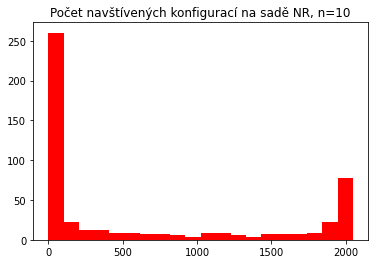

In [116]:
plt.hist(counts.NR[1], bins=20, color='r') 
plt.title("Počet navštívených konfigurací na sadě NR, n=10")

Text(0.5, 1.0, 'Počet navštívených konfigurací na sadě ZR, n=10')

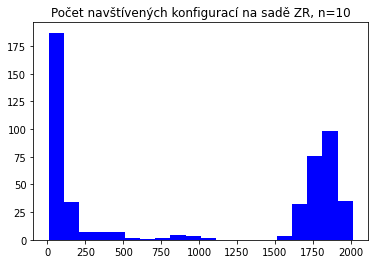

In [117]:
plt.hist(counts.ZR[1], bins=20, color="b") 
plt.title("Počet navštívených konfigurací na sadě ZR, n=10")

(array([383.,  51.,  26.,  18.,   6.,   6.,   1.,   1.,   2.,   2.,   1.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.  ,  23.75,  47.5 ,  71.25,  95.  , 118.75, 142.5 , 166.25,
        190.  , 213.75, 237.5 , 261.25, 285.  , 308.75, 332.5 , 356.25,
        380.  , 403.75, 427.5 , 451.25, 475.  ]),
 <BarContainer object of 20 artists>)

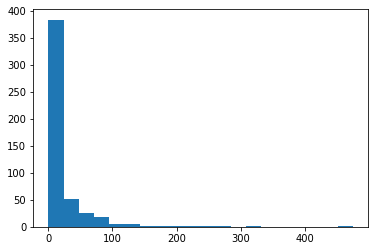

In [87]:
plt.hist(counts.BBNR[1], bins=20) 
plt.title("Počet navštívených konfigurací na sadě NR, n=10, B&B")

(array([154.,  46.,  20.,  14.,   9.,  14.,  18.,  27.,  20.,  21.,  23.,
         31.,  20.,  25.,  18.,  18.,  10.,   5.,   5.,   2.]),
 array([   7. ,   56.8,  106.6,  156.4,  206.2,  256. ,  305.8,  355.6,
         405.4,  455.2,  505. ,  554.8,  604.6,  654.4,  704.2,  754. ,
         803.8,  853.6,  903.4,  953.2, 1003. ]),
 <BarContainer object of 20 artists>)

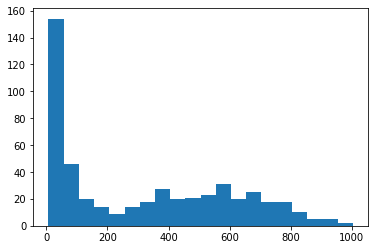

In [88]:
plt.hist(counts.BBZR[1], bins=20)
plt.title("Počet navštívených konfigurací na sadě ZR, n=10, B&B")